### Data Attributes Summary

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mel = pd.read_csv('Melbourne_housing_FULL.csv')
mel.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
mel.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


### Checking for NaN values

In [6]:
len(mel)

34857

In [5]:
mel.isnull().sum().sort_values(ascending= False)

BuildingArea     21115
YearBuilt        19306
Landsize         11810
Car               8728
Bathroom          8226
Bedroom2          8217
Longtitude        7976
Lattitude         7976
Price             7610
Regionname           3
CouncilArea          3
Propertycount        3
Postcode             1
Distance             1
Address              0
Date                 0
SellerG              0
Method               0
Type                 0
Rooms                0
Suburb               0
dtype: int64

First and foremost there are missing values in our dependent variable based on explanation available on Kaggle it is not clear why Price hs has missing values. Perhaps they just missed the data. In the absence, of this information we can delete these 7,610 records

In [7]:
mel = mel.dropna(subset= ['Price'])

#checking those remaining missing values
mel.isnull().sum().sort_values(ascending= False)

BuildingArea     16591
YearBuilt        15163
Landsize          9265
Car               6824
Bathroom          6447
Bedroom2          6441
Longtitude        6254
Lattitude         6254
Regionname           3
CouncilArea          3
Propertycount        3
Postcode             1
Distance             1
Address              0
Date                 0
SellerG              0
Method               0
Price                0
Type                 0
Rooms                0
Suburb               0
dtype: int64

In [8]:
len(mel)

27247

We still have considerable missing values in potentially influential independent variables such as BuildingArea, Landsize etc.

In [10]:
null_columns = mel.isnull().sum().sort_values(ascending= False)
null_columns.index

Index(['BuildingArea', 'YearBuilt', 'Landsize', 'Car', 'Bathroom', 'Bedroom2',
       'Longtitude', 'Lattitude', 'Regionname', 'CouncilArea', 'Propertycount',
       'Postcode', 'Distance', 'Address', 'Date', 'SellerG', 'Method', 'Price',
       'Type', 'Rooms', 'Suburb'],
      dtype='object')

In [13]:
#We will fill those remaining large of NaN values, particularly more columns having missing values more than 3
#based on median value
for i in range(null_columns.size):
    if null_columns[i] == 3:
        break
    mel[null_columns.index[i]].fillna(mel[null_columns.index[i]].median(), inplace= True)

C:\Users\ngmin\AppData\Local\Temp\ipykernel_16776\3700038338.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if null_columns[i] == 3:
C:\Users\ngmin\AppData\Local\Temp\ipykernel_16776\3700038338.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mel[null_columns.index[i]].fillna(mel[null_columns.index[i]].median(), inplace= True)
C:\User

In [14]:
mel.isnull().sum().sort_values(ascending= False)

Propertycount    3
Regionname       3
CouncilArea      3
Distance         1
Postcode         1
Car              0
Longtitude       0
Lattitude        0
YearBuilt        0
BuildingArea     0
Landsize         0
Suburb           0
Bathroom         0
Address          0
Date             0
SellerG          0
Method           0
Price            0
Type             0
Rooms            0
Bedroom2         0
dtype: int64

You can see that those remaining missing values above are not significant enough and can be deleted

In [19]:
mel = mel.dropna(subset=['Propertycount', 'Regionname', 'CouncilArea', 'Distance', 'Postcode'])
mel.isnull().sum().sort_values(ascending= False)

Suburb           0
Bathroom         0
Regionname       0
Longtitude       0
Lattitude        0
CouncilArea      0
YearBuilt        0
BuildingArea     0
Landsize         0
Car              0
Bedroom2         0
Address          0
Postcode         0
Distance         0
Date             0
SellerG          0
Method           0
Price            0
Type             0
Rooms            0
Propertycount    0
dtype: int64

Now that we have addressed the missing values and set the correct datatype for the date columns we move on to basic data exploration to help the company understand the Melbourne Housing Market charactetistics

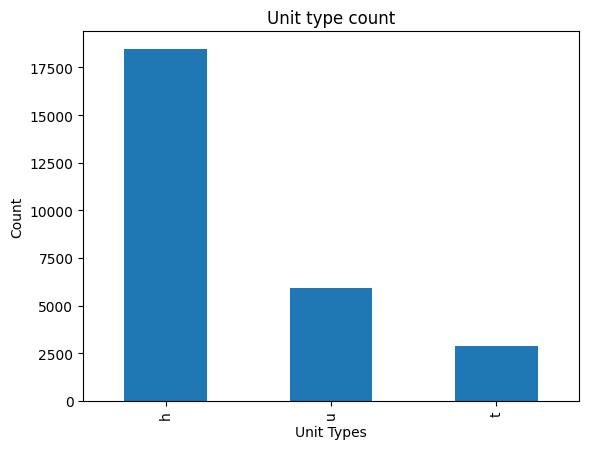

In [21]:
#property types

mel['Type'].value_counts().plot(kind= 'bar')
plt.xlabel('Unit Types')
plt.ylabel('Count')
plt.title('Unit type count')
plt.show()

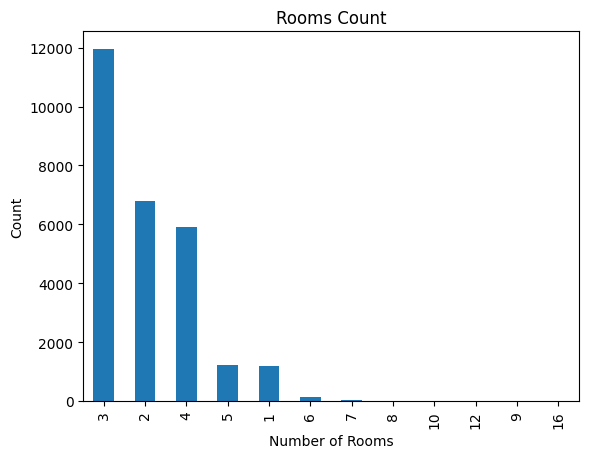

In [25]:
mel['Rooms'].value_counts().plot(kind= 'bar')
plt.xlabel('Number of Rooms')
plt.ylabel('Count')
plt.title('Rooms Count')
plt.show()

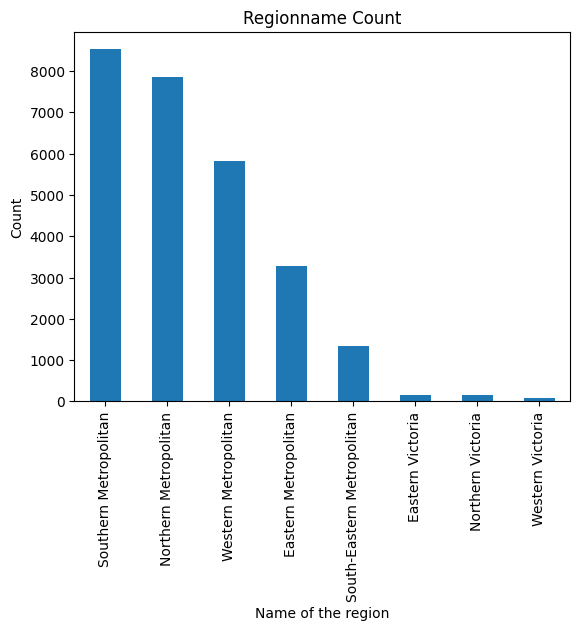

In [24]:
mel['Regionname'].value_counts().plot(kind= 'bar')
plt.xlabel('Name of the region')
plt.ylabel('Count')
plt.title('Regionname Count')
plt.show()

From the above graphs, You can see that:
1. Most of properties are House
2. Number of rooms concentrate in 3, 2, 4 (particularly, 3 rooms are the highest record)
3. The concentration of regions is in Metropolitan area specially: Southern, Northern, Western